# **Overview**.    

The gaming industry is certainly one of the thriving industries of the modern age and one of those that are most influenced by the advancement in technology. With the availability of technologies like AR/VR in consumer products like gaming consoles and even smartphones, the gaming sector shows great potential. In this hackathon, you as a data scientist must use your analytical skills to predict the sales of video games depending on given factors. Given are **8 distinguishing factors** that can influence the sales of a video game. Your objective as a data scientist is to build a machine learning model that can accurately predict the sales in millions of units for a given game.

Project dataset source link: [MachineHack Hackathon](https://machinehack.com/hackathon/video_game_sales_prediction_weekend_hackathon_10/data)

After registering for the hackathon we receive 3 files viz. Sample submission, Train and Test.csv.

**Data Description**:-
The unzipped folder will have the following files.

Train.csv –  3506 observations.     
Test.csv –  1503 observations.    
Sample Submission – Sample format for the submission.    
**Target Variable**: SalesInMillions

Once downloaded we can run below code cell to upload the files to this notebook. Run the below code cell, then click on `Choose Files` button to upload files to google colab.

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Test.csv to Test.csv
Saving Train.csv to Train.csv
User uploaded file "Test.csv" with length 9736 bytes
User uploaded file "Train.csv" with length 9736 bytes


# File Imports

In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Read the csv files
input = pd.read_csv("Train.csv")

In [ ]:
#print all columns to understand the dataset
input.head()

,start_date,end_date,bank_name,no_credit_cards,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_mn,no_credit_card_pos_txn_value_in_mn,total credit card sales(Rs)
0,01-11-2011,30-11-2011,Kotak Mahindra Bank Ltd,192718,2289,260626,20.7085,686.063,96359000
1,01-10-2011,31-10-2011,Kotak Mahindra Bank Ltd,187268,2192,252416,19.6148,775.188,93634000
2,01-09-2011,30-09-2011,Kotak Mahindra Bank Ltd,182947,2206,220001,20.3515,625.740,91473500
3,01-08-2011,31-08-2011,Kotak Mahindra Bank Ltd,175684,2136,235292,18.7607,602.642,87842000
4,01-07-2011,31-07-2011,Kotak Mahindra Bank Ltd,170199,2177,223841,19.5709,549.763,85099500


# Data cleaning

In [ ]:
input.isnull().sum()

start_date                            0
end_date                              0
bank_name                             0
no_credit_cards                       0
no_credit_card_atm_txn                0
no_credit_card_pos_txn                0
no_credit_card_atm_txn_value_in_mn    0
no_credit_card_pos_txn_value_in_mn    0
total credit card sales(Rs)           0
dtype: int64

There are no null values in the dataset. So we can move to the next step of removing unnecessary columns. 

From dataset, we can observe that except `id` column, all the other columns play a significant role in final sales of videogames. So it can be dropped.

In [ ]:
input = input.drop(columns=['end_date'])
train, test = train_test_split(input, test_size=0.2, random_state=42, shuffle=True)

# Descriptive Statistics

In [ ]:
train.shape, test.shape

((80, 8), (21, 8))

In [ ]:
train.nunique()

start_date                            80
bank_name                              2
no_credit_cards                       80
no_credit_card_atm_txn                79
no_credit_card_pos_txn                79
no_credit_card_atm_txn_value_in_mn    80
no_credit_card_pos_txn_value_in_mn    80
total credit card sales(Rs)           80
dtype: int64

In [ ]:
#If you are seeing the output below for the first time visit this link
#to understand what the values in each of this rows(mean, std, min, max) actually 
#are:- https://www.w3resource.com/pandas/dataframe/dataframe-describe.php
train.describe()

,no_credit_cards,no_credit_card_atm_txn,no_credit_card_pos_txn,no_credit_card_atm_txn_value_in_mn,no_credit_card_pos_txn_value_in_mn,total credit card sales(Rs)
count,8.000000e+01,80.000000,8.000000e+01,80.000000,80.000000,8.000000e+01
mean,8.069615e+05,17021.975000,1.892441e+06,162.347451,17337.905040,4.034808e+08
std,5.937476e+05,16625.389354,1.752957e+06,499.071806,76586.249075,2.968738e+08
min,0.000000e+00,0.000000,1.830110e+05,18.079600,513.079000,0.000000e+00
25%,3.478908e+05,3712.250000,5.642218e+05,25.495325,1820.990000,1.739454e+08
50%,6.124580e+05,10123.500000,1.202160e+06,46.873800,3666.375000,3.062290e+08
75%,1.130992e+06,30886.500000,2.636880e+06,127.650730,8279.839486,5.654961e+08
max,2.140854e+06,51268.000000,6.170436e+06,3722.000000,656678.000000,1.070427e+09


From above table, my first insight is I can create bar charts of **console, year**, **category** and **ratings** columns easily. For other columns I might have to go for some other visual representation since the the number of unique values is high.

*   From **SalesInMillions** column we can see that average 
sales have been around 2 million and max sales have reached a mark of about 84 million🤩 and min sales were around just 1500😔.
*   From **year** column we can see that data covers sales from the year 1997 to 2019
*   **Critic Points** range from 0.5 to 23.25 while **user points** range from 0.0003 to 2.32. We might need to noramlise this values on same scale else critic points will have higher impact than user points on final prediction although in reality both of them should have equal importance.



# EDA

I am first opting for auto EDA packages like pandas-profiling for generating visualisations and there corresponding reports.

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 47.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 99.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 91.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 32.0 MB/s eta 0:00:00
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=328711 sha256=d6a2b7c3ed52f3da0c109b78d4c9309a60ea1289b46d4c001bb3dfd5af97faed
  Stored in directory: /tmp/pip-ephem-wheel-cache-c3g002cs/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=

In [ ]:
from pandas_profiling import ProfileReport
report = ProfileReport(train, title="Report", html={'style': {'full_width':True}}, explorative=True, missing_diagrams={'bar': True})

In [ ]:
report.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [1]:
#Save the report in file
report.to_file("pandas_profiling_report.html")

NameError: ignored

From the above reports we can gain following insights:-   
*   Console column graph:   
<img src="https://res.cloudinary.com/dk22rcdch/image/upload/v1595439244/VideoGameDatasetAnalysisImages/Screenshot_2020-07-22_at_11.02.44_PM_nxz5cm.png" width=400>      
The sales of **PS2** were the highest in the data set

*   Years Column graph:   
<img src="https://res.cloudinary.com/dk22rcdch/image/upload/v1595439371/VideoGameDatasetAnalysisImages/Screenshot_2020-07-22_at_11.05.51_PM_ycn3nl.png" width=400>  
The sales were highest between the period **2005-2010**. 

*   Game category column graph:   
<img src="https://res.cloudinary.com/dk22rcdch/image/upload/v1595439531/VideoGameDatasetAnalysisImages/Screenshot_2020-07-22_at_11.08.40_PM_ugwpdi.png" width=400>   
  **Action** category games are most popular

Now let's compare individual columns with target(SalesInMillions) column to gain a few more insights into the data.

In [ ]:
#Sales of games that happened corresponding to each console. 
df = pd.DataFrame(train.groupby(['start_date']).agg({'SalesInMillions': 'sum'}))

KeyError: ignored

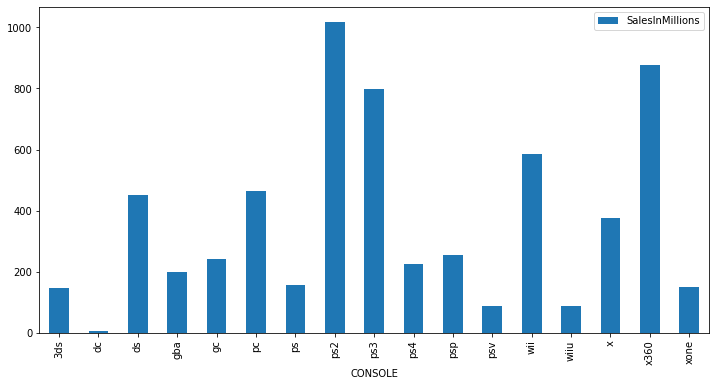

In [ ]:
df.plot.bar(figsize=(12, 6))

**💡Insight**:  From the above graph we can see that sales were highest for PS3 platform followed by Xbox360

In [ ]:
df = pd.DataFrame(train.groupby(['YEAR']).agg({'SalesInMillions': 'sum'}))

In [2]:
df.plot.bar(figsize=(12, 6))

NameError: ignored

**💡Insight**:  From the above graph we can see that sales were highest in the year 2010

In [ ]:
df = pd.DataFrame(train.groupby(['CATEGORY']).agg({'SalesInMillions': 'sum'}))

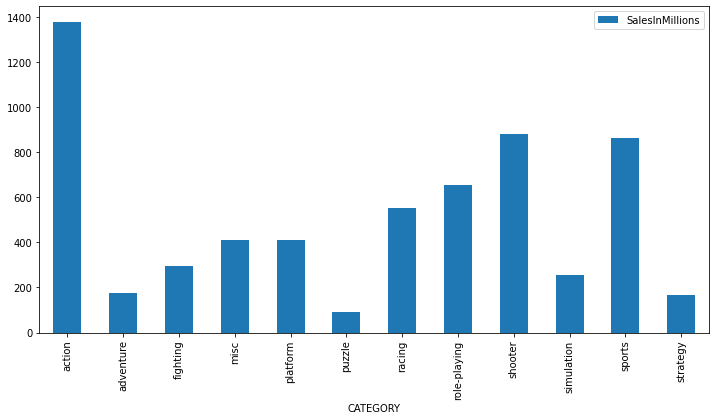

In [ ]:
df.plot.bar(figsize=(12, 6))

**💡Insight**:  From the above graph we can see that sales were highest for action genre

# Model training

In [ ]:
!pip install catboost

In [ ]:
import catboost as cat
cat_feat = ['CONSOLE','CATEGORY', 'PUBLISHER', 'RATING']
features = list(set(train.columns)-set(['SalesInMillions']))
target = 'SalesInMillions'
model = cat.CatBoostRegressor(random_state=100,cat_features=cat_feat,verbose=0)
model.fit(train[features],train[target])

# Model Accuracy

In [ ]:
y_true= pd.DataFrame(data=test[target], columns=['SalesInMillions'])
test_temp = test.drop(columns=[target])

In [ ]:
y_pred = model.predict(test_temp[features])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_true, y_pred))
print(rmse)

1.5514154805345701


In [ ]:
import pickle
filename = 'finalized_model.sav'

In [ ]:
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
test_temp[features].head(1)

,CATEGORY,YEAR,USER_POINTS,CONSOLE,RATING,PUBLISHER,CRITICS_POINTS
3272,shooter,2015,0.009848,ps3,M,Take-Two Interactive,2.806452


In [ ]:
loaded_model.predict(test_temp[features].head(1))

array([2.90177037])